In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

In [100]:
df = pd.read_csv("2013_Accidents_UK.csv")


/var/folders/46/hsbxplj52vzglgl5v7brpmh00000gn/T/ipykernel_93342/2776787506.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2013_Accidents_UK.csv")


In [105]:
df['accident_severity'].value_counts()

Slight     117467
Serious     19585
Fatal        1608
Name: accident_severity, dtype: int64

/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


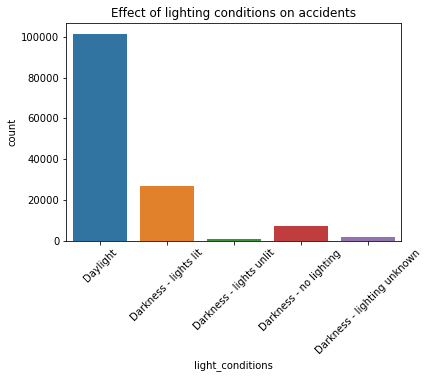

In [106]:
# To what extent does the light conditions effect the number of accidents
sns.countplot('light_conditions', data =df )
plt.title('Effect of lighting conditions on accidents')
plt.xticks(rotation=45)
plt.show()

/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


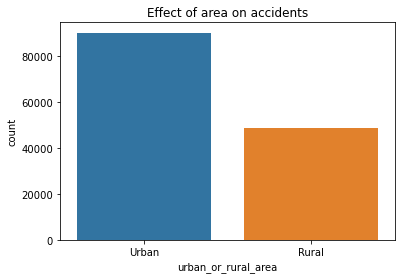

In [107]:
# To what extent does the area effect the number of accidents
sns.countplot('urban_or_rural_area', data =df )
plt.title('Effect of area on accidents')
plt.show()


/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


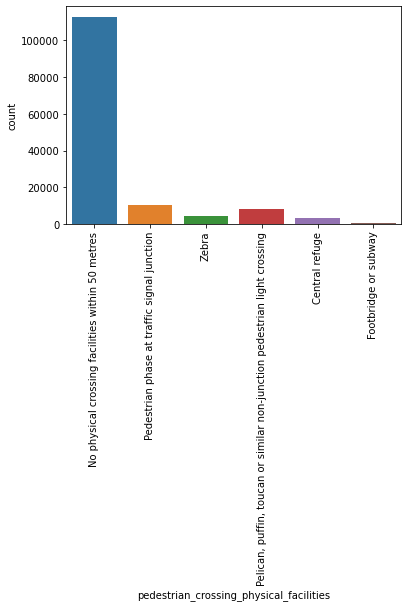

In [108]:
sns.countplot('pedestrian_crossing_physical_facilities', data =df )
plt.xticks(rotation=90)
plt.show()


In [109]:
df['police_force'].value_counts()

Metropolitan Police      22789
Thames Valley             5190
West Midlands             5115
Kent                      4872
West Yorkshire            4866
Hampshire                 4475
Sussex                    3948
Devon and Cornwall        3924
Greater Manchester        3861
Essex                     3856
Surrey                    3793
Lancashire                3755
Strathclyde               3508
Avon and Somerset         3309
Northumbria               3054
South Yorkshire           2992
Staffordshire             2804
Merseyside                2655
Nottinghamshire           2643
Humberside                2578
Cheshire                  2561
Leicestershire            2392
South Wales               2345
Hertfordshire             2320
Lincolnshire              2310
Derbyshire                2286
West Mercia               2256
Lothian and Borders       2102
Cambridgeshire            2067
North Yorkshire           2025
Norfolk                   1776
Dorset                    1774
Suffolk 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138660 entries, 0 to 138659
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               138660 non-null  object 
 1   accident_year                                138660 non-null  int64  
 2   accident_reference                           138660 non-null  object 
 3   location_easting_osgr                        138660 non-null  float64
 4   location_northing_osgr                       138660 non-null  float64
 5   longitude                                    138660 non-null  float64
 6   latitude                                     138660 non-null  float64
 7   police_force                                 138660 non-null  object 
 8   accident_severity                            138660 non-null  object 
 9   number_of_vehicles                           138660 non-nul

/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


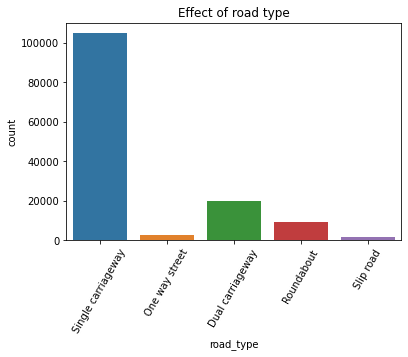

In [111]:
# To what extent does the area effect the number of accidents
sns.countplot('road_type', data =df )
plt.title('Effect of road type')
plt.xticks(rotation=60)
plt.show()

In [112]:
df['first_road_class'].unique()
df.groupby(['longitude', 'latitude']).nunique()

,,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
longitude,latitude,,,,,,,,,,,,,,,,,,,,,
-7.489410,56.955583,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-7.365832,57.275574,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-7.327931,57.547895,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-7.314140,57.523020,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-6.828983,57.906758,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.755779,52.486116,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.755858,52.486356,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.756287,52.484481,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [113]:
location = df.groupby(['lsoa_of_accident_location']).count()
(df.isna().mean())*100

accident_index                                  0.000000
accident_year                                   0.000000
accident_reference                              0.000000
location_easting_osgr                           0.000000
location_northing_osgr                          0.000000
longitude                                       0.000000
latitude                                        0.000000
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.000000
first_road_class               

In [124]:
#C Cleaning Trunk Road Flag Column, Converting String to Boolean & Missing to Null
df['trunk_road_flag'] = df['trunk_road_flag'].replace('Non-trunk', False)
df['trunk_road_flag'] = df['trunk_road_flag'].replace('Trunk (Roads managed by Highways England)', True)
df['trunk_road_flag'] = df['trunk_road_flag'].replace('Data missing or out of range', np.nan)



In [128]:
# 10% are Missing
df['trunk_road_flag'].isnull().mean()*100


10.726958026828214

In [133]:
# Dropping the accident year coumn because all accidents occured in the same year
df = df.drop(['accident_year'], axis = 1)

In [141]:
len(df.columns)

35

# Eh lazmet el accident index? can we drop it?
# Hanemsek column, column w n clean el null values w netsaraf law howa string?
